import the pickle `.pkl` files to compare dictionaries

In [ ]:
import pickle

file1 = "ERR4775538"
file2 = "ERR4775526"
file3 = "ERR4775569"
threshold = 5

dict1 = None
dict2 = None
dict3 = None

with open('results/ibs/ibs_dicts/' + file1 + '.pkl', 'rb') as f:
    dict1 = pickle.load(f)

with open('results/ibs/ibs_dicts/' + file2 + '.pkl', 'rb') as f:
    dict2 = pickle.load(f)


with open('results/ibs/ibs_dicts/' + file3 + '.pkl', 'rb') as f:
    dict3 = pickle.load(f)

classifier = "family"



In [ ]:
# constant threshold

def add_edges(d1, d2, classifier, threshold):
    res = []
    d1_c = d1[classifier]
    d2_c = d2[classifier]

    for key in d1_c:
        if key in d2_c and d1_c[key] > threshold and d2_c[key] > threshold:
            if key not in res:
                res.append(key)
    
    return res

shared_list12 = add_edges(dict1, dict2, classifier, threshold)
shared_list13 = add_edges(dict1, dict3, classifier, threshold)
shared_list23 = add_edges(dict2, dict3, classifier, threshold)

print(len(shared_list12), len(shared_list13), len(shared_list23))
print(shared_list12)
print(shared_list13)
print(shared_list23)

In [ ]:
# threshold based on averages (doesn't work, don't use!)

def compute_averages(dict1, dict2, dict3):
    dict1_c = dict1[classifier]
    dict2_c = dict2[classifier]
    dict3_c = dict3[classifier]

    key_avg_dict = {}
    for key in dict1_c:
        if key not in key_avg_dict:
            key_avg_dict[key] = dict1_c[key]
            if key in dict2_c:
                key_avg_dict[key] += dict2_c[key]
            if key in dict3_c:
                key_avg_dict[key] += dict3_c[key]
            key_avg_dict[key] /= 3
    
    for key in dict2_c:
        if key not in key_avg_dict:
            key_avg_dict[key] = dict2_c[key]
            if key in dict1_c:
                key_avg_dict[key] += dict1_c[key]
            if key in dict3_c:
                key_avg_dict[key] += dict3_c[key]
            key_avg_dict[key] /= 3

    for key in dict3_c:
        if key not in key_avg_dict:
            key_avg_dict[key] = dict3_c[key]
            if key in dict2_c:
                key_avg_dict[key] += dict2_c[key]
            if key in dict1_c:
                key_avg_dict[key] += dict1_c[key]
            key_avg_dict[key] /= 3
    
    return key_avg_dict

key_avg_dict = compute_averages(dict1, dict2, dict3)
print(key_avg_dict)
edge_list = []

def add_edges(dict, edge_list, tag = None):
    for key in dict[classifier]:
        for key2 in dict[classifier]:
            if key != key2 and dict[classifier][key] > 2.9*key_avg_dict[key] and dict[classifier][key2] > 2.9*key_avg_dict[key2]:
                print(tag, (key, key2))
                if (key, key2) not in edge_list and (key2, key) not in edge_list:
                    edge_list.append((key, key2))
        
add_edges(dict1, edge_list, tag = 1)
add_edges(dict2, edge_list, tag = 2)
add_edges(dict3, edge_list, tag = 3)

print(len(edge_list))
print(edge_list)


['Flavobacteriaceae', 'Halobacteriaceae', 'Carsonella', 'Flavobacteriaceae', 'Oscillospiraceae', 'Erysipelotrichaceae', 'Chloroplast', 'AR13', 'Lachnospiraceae', 'Flavobacteriaceae']


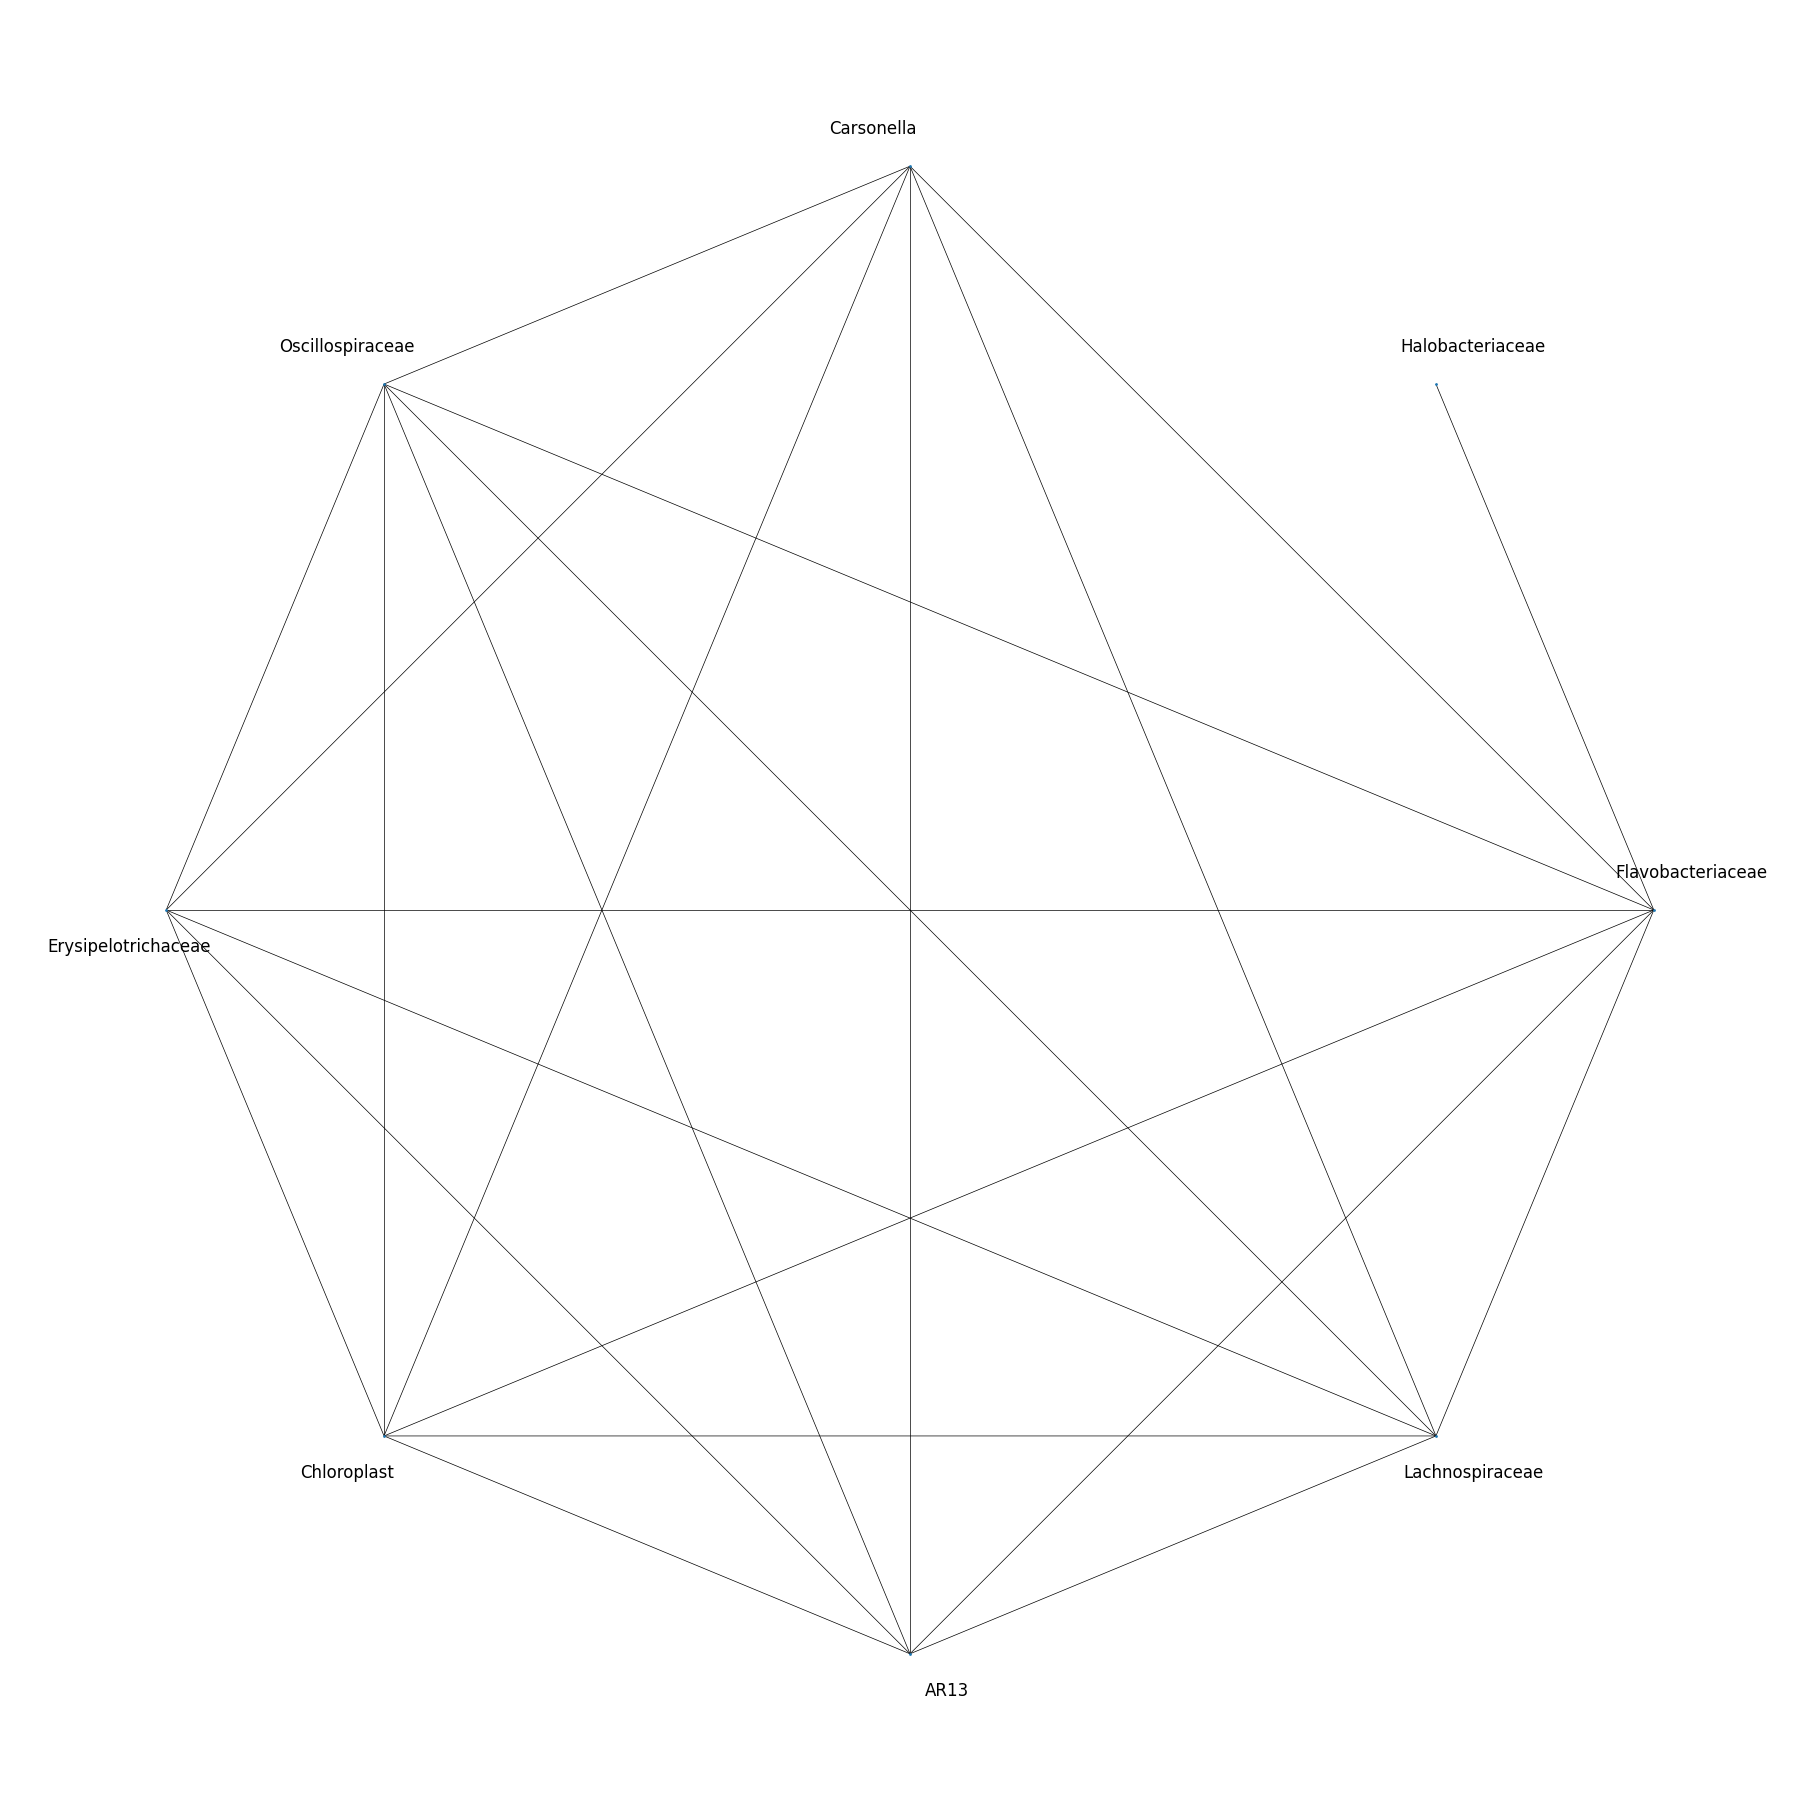

In [89]:
# graphing
import networkx as nx 
import matplotlib.pyplot as plt

graph = nx.Graph()
used = []
for node in shared_list12 + shared_list13 + shared_list23:
    if node not in used:
        graph.add_node(node, node_size=0)
    used.append(node)
print(shared_list12 + shared_list13 + shared_list23)
# graph = nx.circular_layout(graph)

for node in shared_list12:
    for other in shared_list12:
        if node != other:
            graph.add_edge(node, other, weight = 0.1, color = 'red')

for node in shared_list13:
    for other in shared_list13:
        if node != other:
            graph.add_edge(node, other, weight = 0.1)

for node in shared_list23:
    for other in shared_list23:
        if node != other:
            graph.add_edge(node, other, weight = 0.1)


plt.figure(figsize=(18,18))

pos = nx.circular_layout(graph)
pos_higher = {}

offset = 0.05

for k, v in pos.items():
    if(v[1] > 0 and v[0] > 0):
        pos_higher[k] = (v[0] + offset, v[1] + offset)
    elif (v[1] > 0):
        pos_higher[k] = (v[0] - offset, v[1] + offset)
    elif (v[1] <= 0 and v[0] > 0):
        pos_higher[k] = (v[0] + offset, v[1] - offset)
    else:
        pos_higher[k] = (v[0] - offset, v[1] - offset)

nx.draw_circular(graph, node_size = 1, font_size = 8, 
                 label = ("family for " + file1 + ", " + file2 + ", " + file3), width = 0.5)

nx.draw_networkx_labels(graph, pos_higher)

plt.show()

In [ ]:
pickle.dump(graph, open("ibs_graph.pkl", "wb"))